# Task 2: Bayesian Change Point Analysis

In [1]:
# import necessary libraries
import sys
import os
import pandas as pd
from glob import glob

In [2]:
from pathlib import Path
from importlib import reload
# add the project root to the path
project_root = Path("..").resolve()
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

#### Data Loading

In [3]:
# Loading the module
from src.DataLoader import DataLoader
import src.DataLoader
reload(src.DataLoader)

<module 'src.DataLoader' from '/home/chalasimon/Documents/10academy/week 10/challenge/Oil-Price-Analysis/src/DataLoader.py'>

In [4]:
# data path
oil_data_path ="../data/BrentOilPrices.csv"
event_data_path = "../data/event.csv"

In [5]:
# initialize the DataLoader
oil_data_loader = DataLoader(oil_data_path)
event_data_loader = DataLoader(event_data_path)
# load the data
oil_data = oil_data_loader.load_data()
event_data = event_data_loader.load_data()

Data loaded successfully.
Data loaded successfully.


In [6]:
display(oil_data.head())
display(event_data.head())

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


,Event,Start_Date,End_Date,Description,Reference
0,Gulf War (Iraq-Kuwait Crisis),1990-08-02,1991-02-28,Iraqi invasion of Kuwait caused supply fears; ...,EIA
1,Asian Financial Crisis,1997-07-02,1998-12-31,Reduced demand from Asia; prices fell to $10/b...,IMF
2,OPEC Production Cuts (2001),2001-01-17,2001-12-31,OPEC cut 1.5M bpd to stabilize prices post-9/1...,OPEC
3,Iraq War (2003),2003-03-20,2003-12-31,US invasion disrupted Iraqi exports; prices ro...,FRED
4,Global Financial Crisis (2008),2008-09-15,2009-06-30,Demand collapse; prices dropped from $147 to $...,World Bank


In [7]:
print("Oil Data Info:")
print("================================")
print(oil_data.info())
print("\nEvent Data Info:")
print("================================")
print(event_data.info())

Oil Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB
None

Event Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Event        10 non-null     object
 1   Start_Date   10 non-null     object
 2   End_Date     10 non-null     object
 3   Description  10 non-null     object
 4   Reference    10 non-null     object
dtypes: object(5)
memory usage: 532.0+ bytes
None


#### Data Preparation

In [8]:
# load the module
from src.data_cleaner import DataCleaner
import src.data_cleaner
reload(src.data_cleaner)

<module 'src.data_cleaner' from '/home/chalasimon/Documents/10academy/week 10/challenge/Oil-Price-Analysis/src/data_cleaner.py'>

In [9]:
# initialize the DataCleaner
oil_data_cleaner= DataCleaner(missing_threshold=0.1)
event_data_cleaner= DataCleaner(missing_threshold=0.1)

In [10]:
# parse the date
oil_data['Date'] = pd.to_datetime(oil_data['Date'])
event_data['Start_Date'] = pd.to_datetime(event_data['Start_Date'])
event_data['End_Date'] = pd.to_datetime(event_data['End_Date'])

/tmp/ipykernel_1040625/3205842272.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  oil_data['Date'] = pd.to_datetime(oil_data['Date'])


In [11]:
# run the cleaning process
oil_data_cleaned = oil_data_cleaner.transform_oil(oil_data)
event_data_cleaned = event_data_cleaner.transform_event(event_data)

/home/chalasimon/Documents/10academy/week 10/challenge/Oil-Price-Analysis/src/data_cleaner.py:17: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate()


#### Exploratory Data Analysis (EDA)

In [12]:
# Load the module
from src.EDA import EDA
import src.EDA
reload(src.EDA)

<module 'src.EDA' from '/home/chalasimon/Documents/10academy/week 10/challenge/Oil-Price-Analysis/src/EDA.py'>

##### Plotting raw series with events

In [13]:
# load the module of visualization
from src.visualization import BrentVisualizer
import src.visualization
reload(src.visualization)

<module 'src.visualization' from '/home/chalasimon/Documents/10academy/week 10/challenge/Oil-Price-Analysis/src/visualization.py'>

In [14]:
# initialize the visualizer
visualizer = BrentVisualizer(oil_data_cleaned)

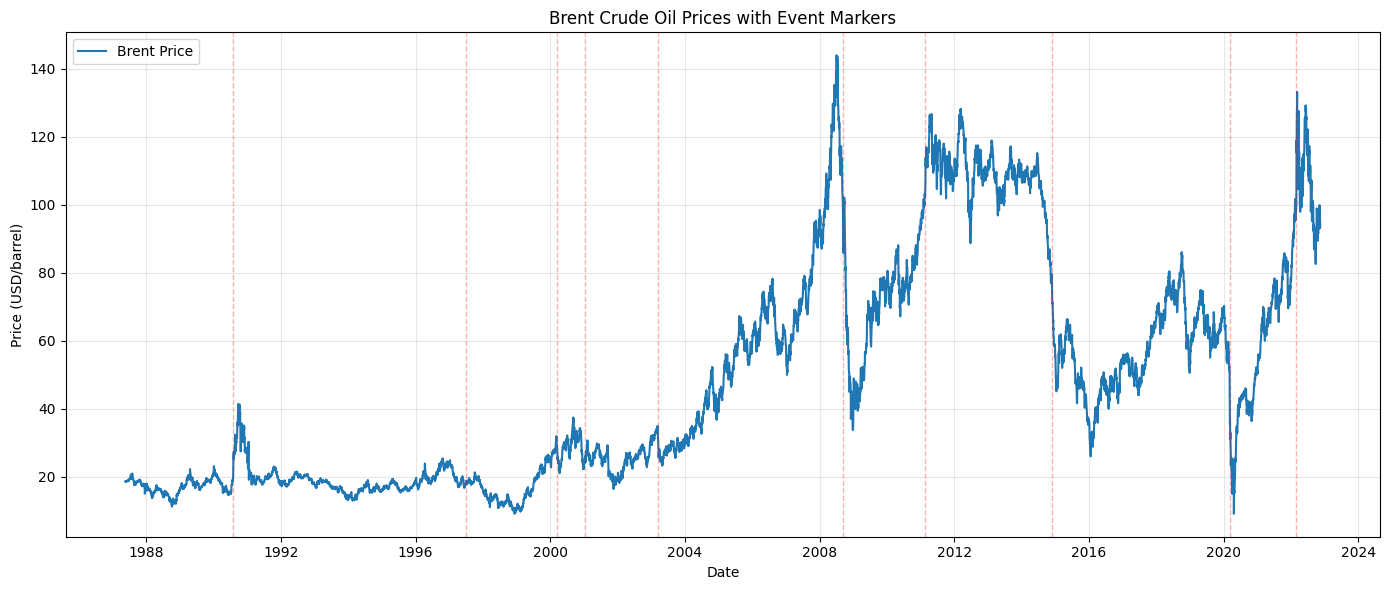

In [15]:
visualizer.plot_raw_prices(events=event_data_cleaned)

##### Stationarity tests

In [16]:
# load the stationarity tester module
from src.stationarity import StationarityTester
import src.stationarity
reload(src.stationarity)

<module 'src.stationarity' from '/home/chalasimon/Documents/10academy/week 10/challenge/Oil-Price-Analysis/src/stationarity.py'>

In [17]:
tester = StationarityTester()
adf_result = tester.adfuller_test(oil_data_cleaned['Price'])
kpss_result = tester.kpss_test(oil_data_cleaned['Price'])

/home/chalasimon/Documents/10academy/week 10/challenge/Oil-Price-Analysis/src/stationarity.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression=regression)


In [18]:
# Get comprehensive summary
stationarity_summary = tester.summary(oil_data_cleaned['Price'])
print(stationarity_summary)

   Test  Statistic   p-value          Result
0   ADF  -1.993856  0.289274  Non-Stationary
1  KPSS   9.558800  0.010000  Non-Stationary


/home/chalasimon/Documents/10academy/week 10/challenge/Oil-Price-Analysis/src/stationarity.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression=regression)


In [19]:
# Transform the data
tester = StationarityTester()
log_returns, _ = tester.make_stationary(oil_data_cleaned['Price'], 'log_diff')

# Verify stationarity
new_results = tester.summary(log_returns)
print(new_results)

   Test  Statistic       p-value      Result
0   ADF -16.427113  2.498580e-29  Stationary
1  KPSS   0.034274  1.000000e-01  Stationary


/home/chalasimon/Documents/10academy/week 10/challenge/Oil-Price-Analysis/src/stationarity.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression=regression)


#### Modeling

In [20]:
# Load the Module
from src.modeling import BayesianCPDetector
import src.modeling
reload(src.modeling)

<module 'src.modeling' from '/home/chalasimon/Documents/10academy/week 10/challenge/Oil-Price-Analysis/src/modeling.py'>

In [21]:
# initialize the Bayesian Change Point Detector
detector = BayesianCPDetector(n_change_points=1)
trace = detector.fit(log_returns, dates=oil_data_cleaned['Date'])

Multiprocess sampling (4 chains in 2 jobs)
CompoundStep
>Metropolis: [tau]
>NUTS: [mu, sigma]


Output()

/home/chalasimon/Documents/10academy/week 10/challenge/Oil-Price-Analysis/.venv/lib/python3.12/site-packages/pymc/step_methods/hmc/quadpotential.py:316: RuntimeWarning: overflow encountered in dot
  return 0.5 * np.dot(x, v_out)
/home/chalasimon/Documents/10academy/week 10/challenge/Oil-Price-Analysis/.venv/lib/python3.12/site-packages/pymc/step_methods/hmc/quadpotential.py:316: RuntimeWarning: overflow encountered in dot
  return 0.5 * np.dot(x, v_out)


/home/chalasimon/Documents/10academy/week 10/challenge/Oil-Price-Analysis/.venv/lib/python3.12/site-packages/pymc/step_methods/hmc/quadpotential.py:316: RuntimeWarning: overflow encountered in dot
  return 0.5 * np.dot(x, v_out)


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 35 seconds.


In [22]:
change_dates=detector.get_change_dates(trace)

#### Visualize the result

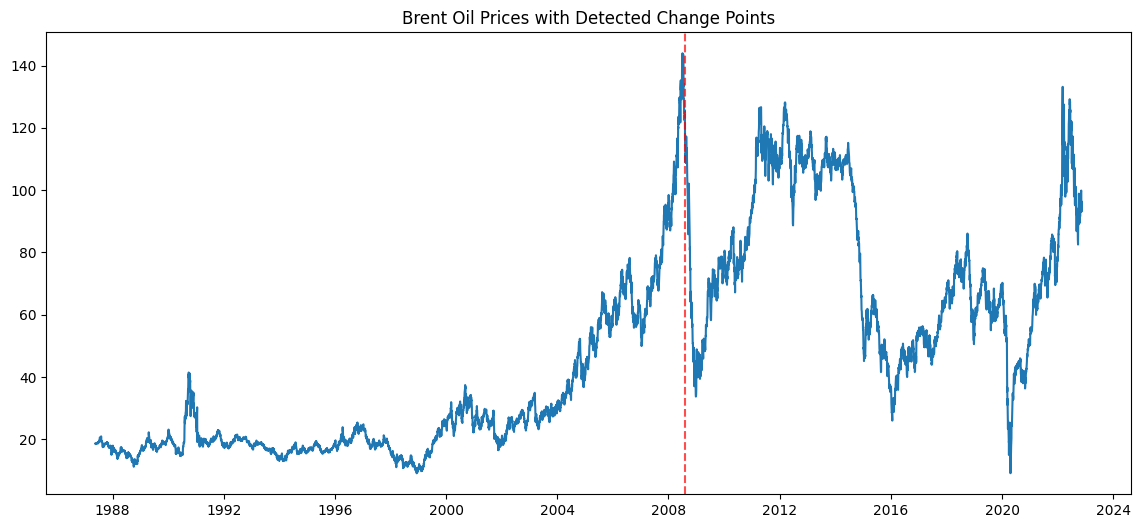

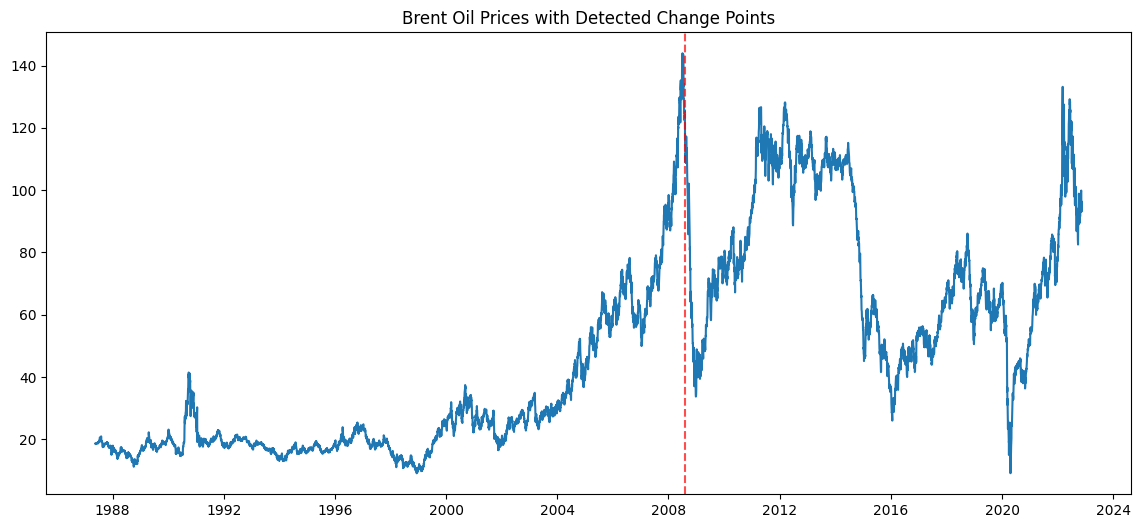

In [23]:
detector.plot_results(trace, oil_data_cleaned.set_index('Date')['Price'])

#### Interpretation of Change Point Detection Results
The Bayesian Change Point model detected a significant structural change in Brent oil prices around 2008. This period coincides with the global financial crisis, which had a major impact on commodity markets, including oil.
The detected change point suggests that the statistical properties of oil prices (such as mean and volatility) shifted significantly at this time. This finding aligns with known historical events and demonstrates the model's ability to identify meaningful changes in the time series.
Next steps include:
- Comparing the detected change point to the event dataset to hypothesize possible causes.
- Quantifying the impact by analyzing the mean and variance before and after the change point.
- Communicating these insights to stakeholders for better decision-making.